# Friendships within a Distributed Group

## Packages & Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pagerank import powerIteration

## Importing Data

### How well do you know this person?

In [2]:
data_2017_know = pd.read_csv("data/2017_know.csv", index_col=0)
data_2017_know

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,2.0,4.0,5.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,4.0,3.0
Emma,3.0,NaN,4.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,2.0,5.0,2.0,5.0
Gabby,4.0,3.0,NaN,4.0,4.0,5.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,5.0
Cam,5.0,3.0,3.0,NaN,4.0,5.0,3.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0
Andrew,3.0,2.0,3.0,5.0,NaN,5.0,2.0,3.0,3.0,4.0,2.0,3.0,4.0,5.0
Isaac,4.0,3.0,5.0,4.0,5.0,NaN,4.0,2.0,4.0,4.0,3.0,4.0,2.0,5.0
Alex,4.0,4.0,5.0,4.0,3.0,4.0,NaN,5.0,3.0,4.0,3.0,4.0,4.0,5.0
Arielle,4.0,4.0,4.0,4.0,3.0,4.0,5.0,NaN,3.0,4.0,2.0,3.0,3.0,3.0
Liam,4.0,3.0,5.0,5.0,5.0,5.0,3.0,4.0,NaN,5.0,3.0,5.0,4.0,4.0
James,4.0,5.0,4.0,5.0,3.0,5.0,4.0,3.0,4.0,NaN,4.0,5.0,4.0,5.0


### How much do you like this person?

In [3]:
data_2017_like = pd.read_csv("data/2017_like.csv", index_col=0)
data_2017_like

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,4.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,1.0
Emma,4.0,NaN,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,5.0
Gabby,5.0,5.0,NaN,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0
Cam,5.0,4.0,4.0,NaN,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0
Andrew,4.0,5.0,5.0,5.0,NaN,5.0,2.0,4.0,3.0,5.0,3.0,2.0,5.0,4.0
Isaac,3.0,4.0,5.0,4.0,4.0,NaN,4.0,4.0,3.0,4.0,3.0,2.0,3.0,5.0
Alex,5.0,5.0,5.0,5.0,4.0,5.0,NaN,5.0,4.0,4.0,4.0,5.0,5.0,3.0
Arielle,5.0,5.0,5.0,5.0,4.0,5.0,5.0,NaN,4.0,5.0,4.0,5.0,4.0,4.0
Liam,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,NaN,5.0,4.0,5.0,5.0,4.0
James,4.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,4.0,NaN,4.0,5.0,4.0,3.0


### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

In [4]:
data_2017_contact = pd.read_csv("data/2017_contact.csv", index_col=0)
data_2017_contact

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,1.0,4.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0
Emma,2.0,NaN,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,5.0
Gabby,3.0,1.0,NaN,3.0,2.0,5.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,5.0
Cam,4.0,2.0,3.0,NaN,2.0,3.0,2.0,3.0,2.0,3.0,1.0,2.0,1.0,1.0
Andrew,1.0,1.0,2.0,3.0,NaN,4.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0
Isaac,1.0,1.0,5.0,2.0,3.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0
Alex,2.0,2.0,3.0,3.0,1.0,1.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,1.0
Arielle,1.0,1.0,1.0,3.0,1.0,1.0,5.0,NaN,1.0,1.0,1.0,1.0,1.0,2.0
Liam,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,NaN,3.0,2.0,2.0,2.0,2.0
James,2.0,1.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,NaN,1.0,2.0,1.0,5.0


### How much do you trust this person?

In [5]:
data_2017_trust = pd.read_csv("data/2017_trust.csv", index_col=0)
data_2017_trust

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,3.0,4.0,5.0,1.0,1.0,3.0,4.0,2.0,3.0,2.0,3.0,2.0,2.0
Emma,4.0,NaN,4.0,4.0,4.0,3.0,4.0,5.0,3.0,4.0,2.0,5.0,3.0,5.0
Gabby,5.0,4.0,NaN,5.0,3.0,3.0,5.0,4.0,3.0,4.0,3.0,5.0,4.0,4.0
Cam,5.0,2.0,3.0,NaN,3.0,5.0,2.0,5.0,3.0,5.0,3.0,2.0,3.0,1.0
Andrew,4.0,4.0,4.0,5.0,NaN,5.0,2.0,4.0,3.0,3.0,1.0,2.0,5.0,3.0
Isaac,4.0,5.0,5.0,3.0,4.0,NaN,3.0,4.0,4.0,3.0,3.0,1.0,2.0,5.0
Alex,5.0,5.0,5.0,4.0,2.0,4.0,NaN,5.0,2.0,3.0,3.0,4.0,4.0,2.0
Arielle,5.0,5.0,5.0,5.0,4.0,3.0,5.0,NaN,3.0,3.0,4.0,5.0,3.0,3.0
Liam,4.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0,NaN,5.0,3.0,4.0,5.0,4.0
James,3.0,3.0,4.0,5.0,4.0,4.0,3.0,3.0,2.0,NaN,3.0,3.0,2.0,2.0


### How likely are you to go to this person for advice or emotional support?

In [6]:
data_2017_support = pd.read_csv("data/2017_support.csv", index_col=0)
data_2017_support

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,2.0,4.0,5.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0
Emma,2.0,NaN,3.0,2.0,2.0,2.0,3.0,5.0,1.0,2.0,2.0,3.0,2.0,5.0
Gabby,2.0,4.0,NaN,5.0,3.0,4.0,2.0,2.0,1.0,3.0,1.0,3.0,2.0,3.0
Cam,4.0,1.0,1.0,NaN,2.0,4.0,1.0,5.0,2.0,4.0,1.0,2.0,1.0,1.0
Andrew,2.0,2.0,2.0,2.0,NaN,5.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0
Isaac,1.0,1.0,5.0,2.0,3.0,NaN,1.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0
Alex,4.0,5.0,5.0,3.0,1.0,3.0,NaN,5.0,1.0,1.0,1.0,2.0,3.0,1.0
Arielle,1.0,1.0,1.0,3.0,1.0,1.0,5.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
Liam,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0,1.0,2.0,1.0,2.0
James,3.0,2.0,3.0,5.0,3.0,4.0,2.0,3.0,2.0,NaN,1.0,4.0,2.0,1.0


### General Data / Demographics

In [7]:
data_2017_demographics = pd.read_csv("data/2017_demographics.csv", index_col=0)
data_2017_demographics

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Steph,Ananth,Female,Asian,Pittsburgh,PA,Carnegie Mellon University,15289,Information Systems,Chocolate Chip
Gabby,Bodet,Female,Black or African American,Atlanta,GA,Emory University,30322,Theater Studies,Chocolate Chip
Ziqian,Zhang,Female,Asian,Boston,MA,NaN,2446,NaN,NaN
Alex,Minasian,Female,White,Wenham,MA,Gordon College,1984,Kinesiology,Chocolate Chip
Emma,Bergstrom,Female,White,Wheaton,IL,Wheaton College,60187,Biology (pre-dental),Chocolate Chip
Cam,Hudson,Male,White,Rochester,NY,Rochester Institute of Technology,14623,Computer Engineering,Chocolate Chip & Butterscotch
Isaac,McGonagle,Male,White,Pittsburgh,PA,University of Pittsburgh,15213,Electrical Engineering,Peanut Butter & Chocolate Chip
Liam,O'Toole,Male,White,"Washington, D.C.",DC,The Catholic University of America,20064,Theology,Chocolate Chip
Michelle,Zhou,Female,Asian,Chestnut Hill,MA,Boston College,2467,Theology and Applied Psychology/Human Development,Snickerdoodle


In [8]:
people = list(data_2017_demographics.sort_values(by=['lname']).index)
people

['Steph',
 'Emma',
 'Gabby',
 'Cam',
 'Andrew',
 'Isaac',
 'Alex',
 'Arielle ',
 'Liam',
 'James',
 'Drew',
 'Ruben',
 'Ziqian ',
 'Michelle']

In [9]:
data_2017_demographics_men = data_2017_demographics[data_2017_demographics['gender']=='Male']
data_2017_demographics_men

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Cam,Hudson,Male,White,Rochester,NY,Rochester Institute of Technology,14623,Computer Engineering,Chocolate Chip & Butterscotch
Isaac,McGonagle,Male,White,Pittsburgh,PA,University of Pittsburgh,15213,Electrical Engineering,Peanut Butter & Chocolate Chip
Liam,O'Toole,Male,White,"Washington, D.C.",DC,The Catholic University of America,20064,Theology,Chocolate Chip
Andrew,Jeon,Male,Asian;White,Northfield,MN,St. Olaf College,55057,Computer Science; Economics,Sugar Cookie
Drew,Pelusi,Male,White,Boston,MA,Boston University,2215,Computer Science,Sugar Cookie
James,Palmer,Male,White,Boston,MA,Boston University,2215,International Relations,Brownies
Ruben,Walter,Male,White,Wheaton,IL,Wheaton College,60187,International Relations,Oatmeal Raisin


In [10]:
data_2017_demographics_women = data_2017_demographics[data_2017_demographics['gender']=='Female']
data_2017_demographics_women

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Steph,Ananth,Female,Asian,Pittsburgh,PA,Carnegie Mellon University,15289,Information Systems,Chocolate Chip
Gabby,Bodet,Female,Black or African American,Atlanta,GA,Emory University,30322,Theater Studies,Chocolate Chip
Ziqian,Zhang,Female,Asian,Boston,MA,NaN,2446,NaN,NaN
Alex,Minasian,Female,White,Wenham,MA,Gordon College,1984,Kinesiology,Chocolate Chip
Emma,Bergstrom,Female,White,Wheaton,IL,Wheaton College,60187,Biology (pre-dental),Chocolate Chip
Michelle,Zhou,Female,Asian,Chestnut Hill,MA,Boston College,2467,Theology and Applied Psychology/Human Development,Snickerdoodle
Arielle,Moreira,Female,Brazilian American,Wenham,MA,Gordon College,1984,Social Work,Chocolate Chip


In [11]:
men = list(data_2017_demographics_men.index)
men

['Cam', 'Isaac', 'Liam', 'Andrew', 'Drew', 'James', 'Ruben']

In [12]:
women = list(data_2017_demographics_women.index)
women

['Steph', 'Gabby', 'Ziqian ', 'Alex', 'Emma', 'Michelle', 'Arielle ']

## PageRank: The Numbers

### How well do you know this person?

In [13]:
pr_2017_know = powerIteration(data_2017_know)
pr_2017_know.sort_values(ascending=False)

Cam         0.083307
Michelle    0.080549
Isaac       0.078292
Gabby       0.078014
James       0.077626
Ruben       0.075291
Steph       0.071081
Andrew      0.068307
Emma        0.067573
Ziqian      0.066944
Alex        0.064576
Liam        0.064306
Arielle     0.062643
Drew        0.061491
dtype: float64

### How much do you like this person?

In [14]:
pr_2017_like = powerIteration(data_2017_like)
pr_2017_like.sort_values(ascending=False)

Arielle     0.077967
Gabby       0.076961
Cam         0.076868
Emma        0.075167
James       0.074821
Isaac       0.071840
Steph       0.071654
Andrew      0.070102
Ruben       0.070012
Ziqian      0.069086
Alex        0.068777
Drew        0.067095
Liam        0.066715
Michelle    0.062936
dtype: float64

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

In [15]:
pr_2017_contact = powerIteration(data_2017_contact)
pr_2017_contact.sort_values(ascending=False)

Gabby       0.096908
Cam         0.095811
Michelle    0.095057
Isaac       0.088954
James       0.078608
Steph       0.077483
Alex        0.068506
Andrew      0.066945
Emma        0.061005
Arielle     0.060029
Ruben       0.057839
Ziqian      0.052834
Liam        0.050819
Drew        0.049202
dtype: float64

### How much do you trust this person?

In [16]:
pr_2017_trust = powerIteration(data_2017_trust)
pr_2017_trust.sort_values(ascending=False)

Cam         0.082933
Arielle     0.082595
Gabby       0.081326
Emma        0.079309
Steph       0.078023
James       0.072426
Isaac       0.072400
Ruben       0.068126
Andrew      0.068029
Alex        0.066819
Ziqian      0.065379
Michelle    0.063672
Liam        0.059659
Drew        0.059306
dtype: float64

### How likely are you to go to this person for advice or emotional support?

In [17]:
pr_2017_support = powerIteration(data_2017_support)
pr_2017_support.sort_values(ascending=False)

Cam         0.095395
Arielle     0.093887
Gabby       0.087736
Isaac       0.087159
Emma        0.075109
Steph       0.070976
Michelle    0.070740
Alex        0.070368
Andrew      0.068847
James       0.066255
Ruben       0.064187
Ziqian      0.055337
Liam        0.049379
Drew        0.044626
dtype: float64

## PageRank: Analysis

### How well do you know this person?

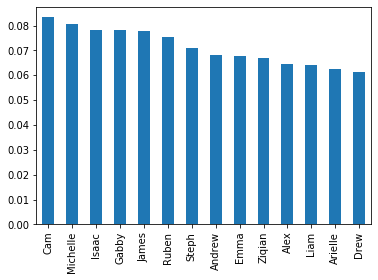

In [20]:
pr_2017_know.sort_values(ascending=False).plot.bar()

In [18]:
pr_2017_know_men = pr_2017_know[pr_2017_know.index.isin(men)==True]
pr_2017_know_men

Cam       0.083307
Andrew    0.068307
Isaac     0.078292
Liam      0.064306
James     0.077626
Drew      0.061491
Ruben     0.075291
dtype: float64

In [19]:
pr_2017_know_women = pr_2017_know[pr_2017_know.index.isin(women)==True]
pr_2017_know_women

Steph       0.071081
Emma        0.067573
Gabby       0.078014
Alex        0.064576
Michelle    0.080549
dtype: float64